# 演示KNN算法原理

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 样本特征
data_X = [
    [1.3, 6],
    [3.5, 5],
    [4.2, 2],
    [5, 3.3],
    [2, 9],
    [5, 7.5],
    [7.2, 4 ],
    [8.1, 8],
    [9, 2.5]
]

In [3]:
# 样本标记
data_y = [0,0,0,0,1,1,1,1,1]

In [4]:
# 训练集
X_train = np.array(data_X)
y_train = np.array(data_y)

In [5]:
X_train

array([[1.3, 6. ],
       [3.5, 5. ],
       [4.2, 2. ],
       [5. , 3.3],
       [2. , 9. ],
       [5. , 7.5],
       [7.2, 4. ],
       [8.1, 8. ],
       [9. , 2.5]])

In [6]:
y_train

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

In [7]:
y_train==0

array([ True,  True,  True,  True, False, False, False, False, False])

In [8]:
X_train[y_train==0]

array([[1.3, 6. ],
       [3.5, 5. ],
       [4.2, 2. ],
       [5. , 3.3]])

In [9]:
X_train[y_train==0,0]

array([1.3, 3.5, 4.2, 5. ])

In [10]:
X_train[y_train==0,1]

array([6. , 5. , 2. , 3.3])

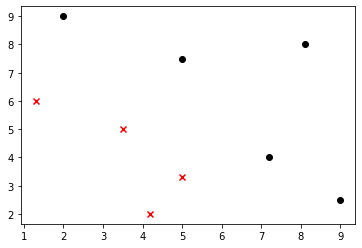

In [11]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='red', marker='x')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='black', marker='o')
plt.show()

In [12]:
# 新的样本点  
data_new = np.array([4,5])

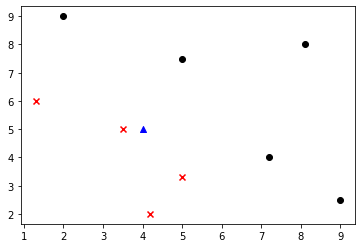

In [13]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='red', marker='x')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='black', marker='o')
plt.scatter(data_new[0], data_new[1],color='b', marker='^')
plt.show()

## KNN 预测的过程

### 1. 计算新样本点与已知样本点的距离

In [14]:
for data in X_train:
    print(np.sqrt(np.sum((data - data_new)**2)))

2.879236009777594
0.5
3.006659275674582
1.9723082923316022
4.47213595499958
2.692582403567252
3.3526109228480423
5.080354318352215
5.5901699437494745


In [15]:
distances = [np.sqrt(np.sum((data - data_new)**2)) for data in X_train]
distances

[2.879236009777594,
 0.5,
 3.006659275674582,
 1.9723082923316022,
 4.47213595499958,
 2.692582403567252,
 3.3526109228480423,
 5.080354318352215,
 5.5901699437494745]

### 2. 按距离排序

In [16]:
np.sort(distances)

array([0.5       , 1.97230829, 2.6925824 , 2.87923601, 3.00665928,
       3.35261092, 4.47213595, 5.08035432, 5.59016994])

In [17]:
sort_index = np.argsort(distances)
sort_index

array([1, 3, 5, 0, 2, 6, 4, 7, 8])

### 3. 确定k值

In [18]:
k = 5

### 4. 距离最近的k个点投票

In [19]:
first_k =  [y_train[i] for i in sort_index[:k]]
first_k

[0, 0, 1, 0, 0]

In [20]:
from collections import Counter
Counter(first_k)

Counter({0: 4, 1: 1})

In [21]:
Counter(first_k).most_common()

[(0, 4), (1, 1)]

In [22]:
Counter(first_k).most_common(1)

[(0, 4)]

In [23]:
predict_y = Counter(first_k).most_common(1)[0][0]
predict_y

0

# scikit-learn中的KNN算法

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
kNN_classifier = KNeighborsClassifier(n_neighbors=5)

In [26]:
kNN_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
data_new.reshape(1,-1)

array([[4, 5]])

In [28]:
predict_y = kNN_classifier.predict(data_new.reshape(1,-1))
predict_y

array([0])